In [15]:
import numpy as np

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from torch.utils.data import DataLoader
from torch.autograd import Variable 

import torch.nn as nn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch

In [17]:
channels = 1
img_size = 128
img_shape = (channels, img_size, img_size)
latent_dim = 200


In [18]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        def block(input_features, output_features, normalize=True):
            layers = [nn.Linear(input_features, output_features)]
            if normalize: # Default
                layers.append(nn.BatchNorm1d(output_features, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True)) # inplace=True : modify the input directly. It can slightly decrease the memory usage.
            return layers # return list of layers
        
        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False), # Asterisk('*') in front of block means unpacking list of layers - leave only values(layers) in list
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))), # np.prod(1, 28, 28) == 1*28*28
            nn.Tanh() # result : from -1 to 1
        )

    def forward(self, z): # z == latent vector(random input vector)
        img = self.model(z) # (64, 100) --(model)--> (64, 784)
        img = img.view(img.size(0), *img_shape) # img.size(0) == N(Batch Size), (N, C, H, W) == default --> (64, 1, 28, 28)
        return img

In [19]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)), 512), # (28*28, 512)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid() # result : from 0 to 1
        )
    
    def forward(self, img):
        img_flat = img.view(img.size(0), -1) #flatten -> from (64, 1, 28, 28) to (64, 1*28*28)
        validity = self.model(img_flat) # Discriminate -> Real? or Fake? (64, 784) -> (64, 1)
        return validity

In [20]:
adversarial_loss = torch.nn.BCELoss()
generator = Generator()
discriminator = Discriminator()

In [21]:
b1 = 0.5
b2 = 0.999
lr = 0.0002 
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1,b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1,b2))

In [22]:


# Define your transformation pipeline
transform = transforms.Compose([
    transforms.Grayscale(),  # Convert image to grayscale if it's not already
    transforms.Resize((img_size, img_size)),  # Resize image to (28, 28) to match MNIST
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize image data
])

dataset = ImageFolder(root='data/train/', transform=transform)
print(dataset)
batch_size = 64 # suggested default, size of the batches
dataloader = DataLoader( # torch.utils.data.DataLoader
    dataset,
    batch_size=batch_size,
    shuffle=True
)

Dataset ImageFolder
    Number of datapoints: 13492
    Root location: data/train/
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


  0%|          | 0/211 [00:00<?, ?it/s]

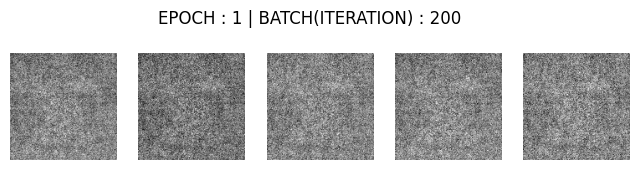

[Epoch: 1/50] [Batch: 211/211] [D loss: 0.169447] [G loss: 1.322454]


  0%|          | 0/211 [00:00<?, ?it/s]

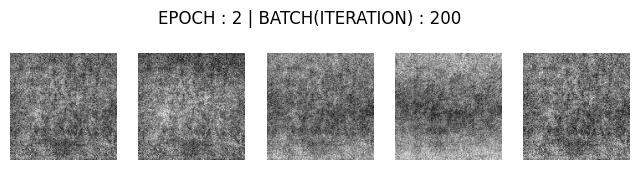

[Epoch: 2/50] [Batch: 211/211] [D loss: 0.332703] [G loss: 1.348207]


  0%|          | 0/211 [00:00<?, ?it/s]

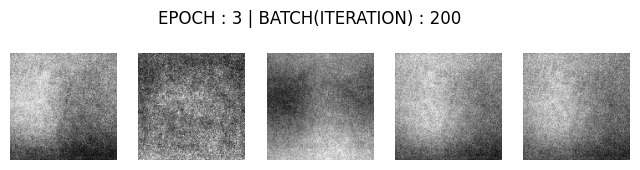

[Epoch: 3/50] [Batch: 211/211] [D loss: 0.302606] [G loss: 1.767880]


  0%|          | 0/211 [00:00<?, ?it/s]

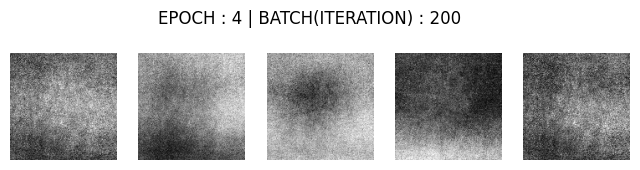

[Epoch: 4/50] [Batch: 211/211] [D loss: 0.516282] [G loss: 0.893239]


  0%|          | 0/211 [00:00<?, ?it/s]

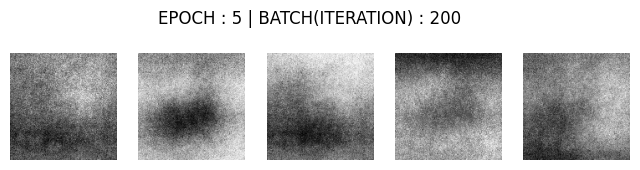

[Epoch: 5/50] [Batch: 211/211] [D loss: 0.444204] [G loss: 1.834919]


  0%|          | 0/211 [00:00<?, ?it/s]

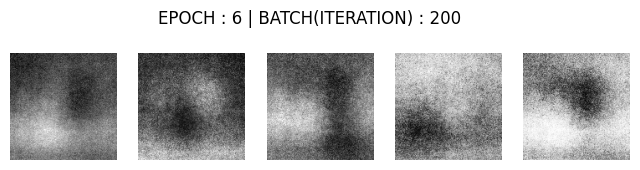

[Epoch: 6/50] [Batch: 211/211] [D loss: 0.467743] [G loss: 1.236860]


  0%|          | 0/211 [00:00<?, ?it/s]

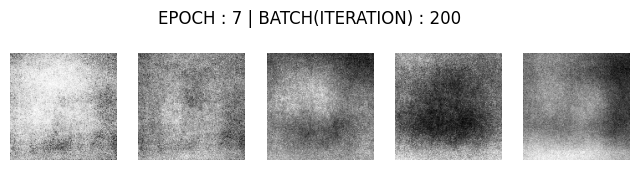

[Epoch: 7/50] [Batch: 211/211] [D loss: 0.437158] [G loss: 1.319509]


  0%|          | 0/211 [00:00<?, ?it/s]

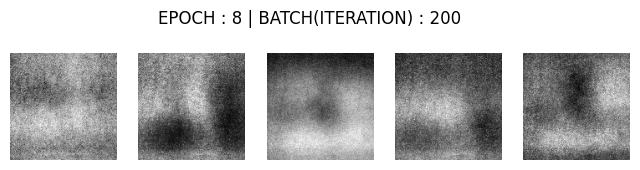

[Epoch: 8/50] [Batch: 211/211] [D loss: 0.529190] [G loss: 1.266558]


  0%|          | 0/211 [00:00<?, ?it/s]

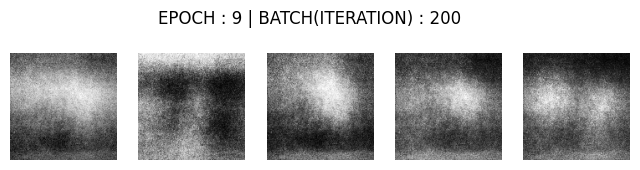

[Epoch: 9/50] [Batch: 211/211] [D loss: 0.437320] [G loss: 1.655146]


  0%|          | 0/211 [00:00<?, ?it/s]

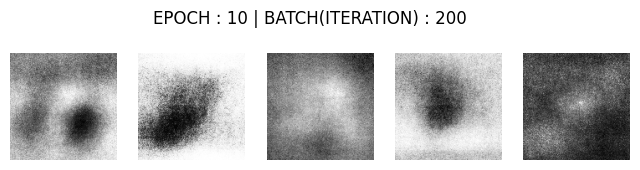

[Epoch: 10/50] [Batch: 211/211] [D loss: 0.481807] [G loss: 1.347021]


  0%|          | 0/211 [00:00<?, ?it/s]

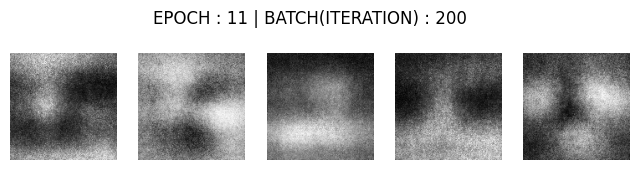

[Epoch: 11/50] [Batch: 211/211] [D loss: 0.427600] [G loss: 1.211256]


  0%|          | 0/211 [00:00<?, ?it/s]

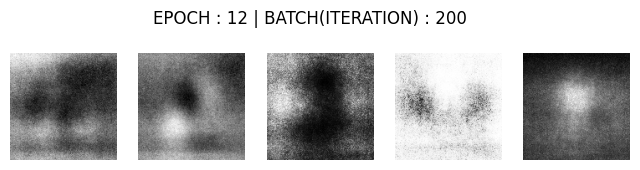

[Epoch: 12/50] [Batch: 211/211] [D loss: 0.543636] [G loss: 1.271392]


  0%|          | 0/211 [00:00<?, ?it/s]

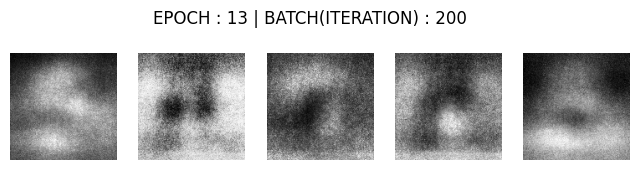

[Epoch: 13/50] [Batch: 211/211] [D loss: 0.444419] [G loss: 1.144735]


  0%|          | 0/211 [00:00<?, ?it/s]

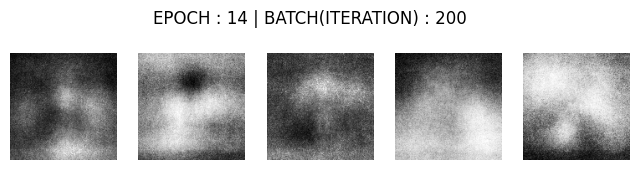

[Epoch: 14/50] [Batch: 211/211] [D loss: 0.542121] [G loss: 0.948325]


  0%|          | 0/211 [00:00<?, ?it/s]

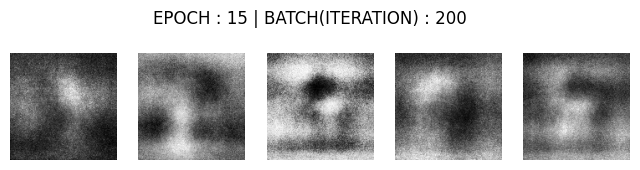

[Epoch: 15/50] [Batch: 211/211] [D loss: 0.645311] [G loss: 1.082208]


  0%|          | 0/211 [00:00<?, ?it/s]

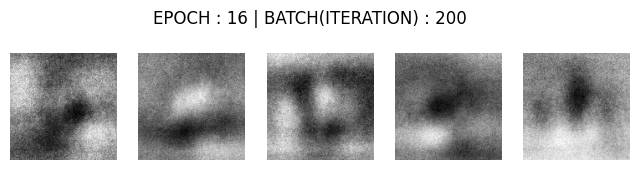

[Epoch: 16/50] [Batch: 211/211] [D loss: 0.469902] [G loss: 1.238723]


  0%|          | 0/211 [00:00<?, ?it/s]

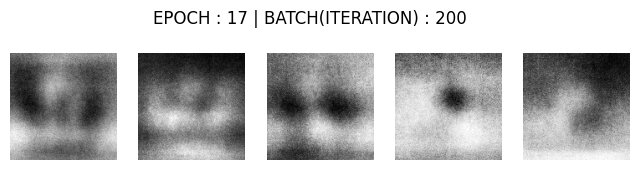

[Epoch: 17/50] [Batch: 211/211] [D loss: 0.478251] [G loss: 1.204400]


  0%|          | 0/211 [00:00<?, ?it/s]

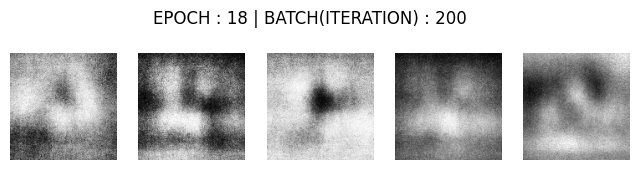

[Epoch: 18/50] [Batch: 211/211] [D loss: 0.686429] [G loss: 1.003940]


  0%|          | 0/211 [00:00<?, ?it/s]

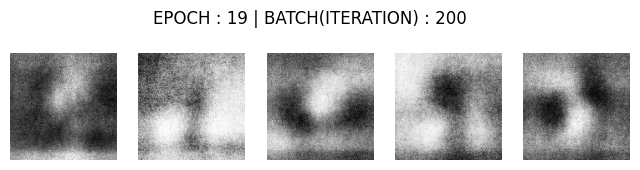

[Epoch: 19/50] [Batch: 211/211] [D loss: 0.415894] [G loss: 1.226706]


  0%|          | 0/211 [00:00<?, ?it/s]

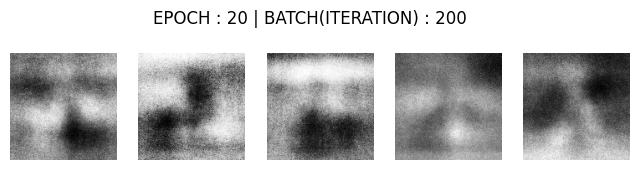

[Epoch: 20/50] [Batch: 211/211] [D loss: 0.647171] [G loss: 1.132259]


  0%|          | 0/211 [00:00<?, ?it/s]

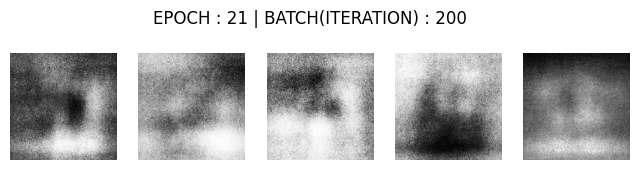

[Epoch: 21/50] [Batch: 211/211] [D loss: 0.468335] [G loss: 1.308663]


  0%|          | 0/211 [00:00<?, ?it/s]

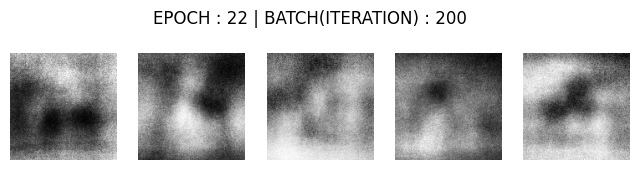

[Epoch: 22/50] [Batch: 211/211] [D loss: 0.502376] [G loss: 1.086882]


  0%|          | 0/211 [00:00<?, ?it/s]

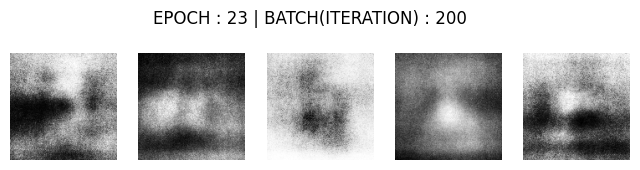

[Epoch: 23/50] [Batch: 211/211] [D loss: 0.642735] [G loss: 1.020258]


  0%|          | 0/211 [00:00<?, ?it/s]

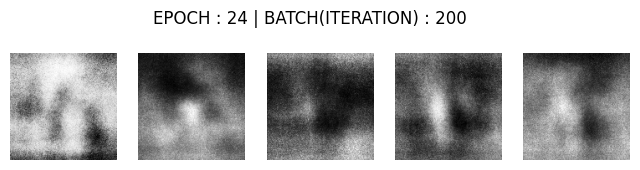

[Epoch: 24/50] [Batch: 211/211] [D loss: 0.565610] [G loss: 1.139088]


  0%|          | 0/211 [00:00<?, ?it/s]

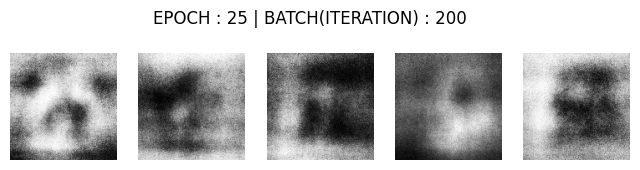

[Epoch: 25/50] [Batch: 211/211] [D loss: 0.582698] [G loss: 1.050205]


  0%|          | 0/211 [00:00<?, ?it/s]

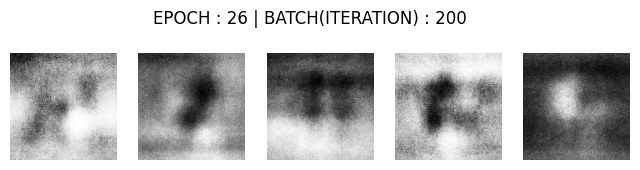

[Epoch: 26/50] [Batch: 211/211] [D loss: 0.569910] [G loss: 1.030107]


  0%|          | 0/211 [00:00<?, ?it/s]

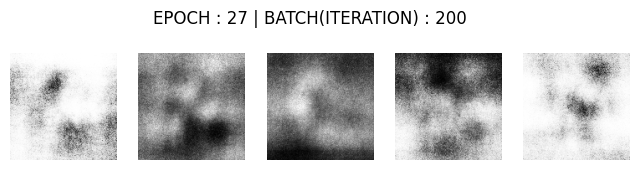

[Epoch: 27/50] [Batch: 211/211] [D loss: 0.576057] [G loss: 1.057408]


  0%|          | 0/211 [00:00<?, ?it/s]

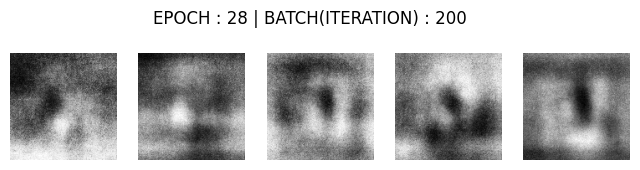

[Epoch: 28/50] [Batch: 211/211] [D loss: 0.527611] [G loss: 1.073605]


  0%|          | 0/211 [00:00<?, ?it/s]

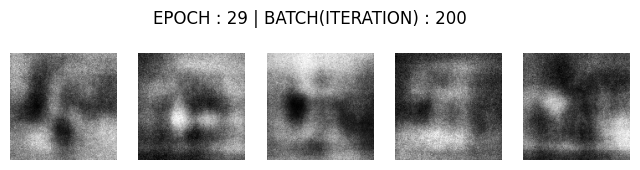

[Epoch: 29/50] [Batch: 211/211] [D loss: 0.640292] [G loss: 0.971335]


  0%|          | 0/211 [00:00<?, ?it/s]

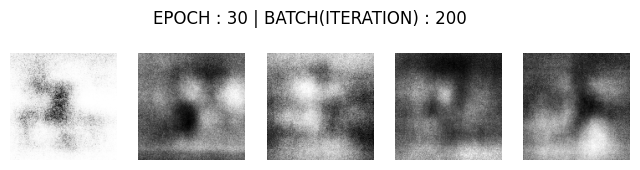

[Epoch: 30/50] [Batch: 211/211] [D loss: 0.557187] [G loss: 1.151559]


  0%|          | 0/211 [00:00<?, ?it/s]

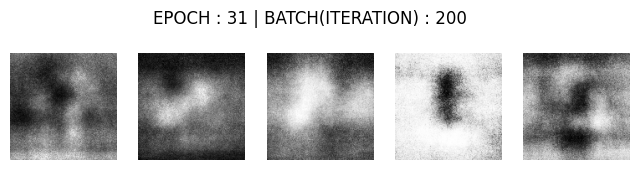

[Epoch: 31/50] [Batch: 211/211] [D loss: 0.660704] [G loss: 1.136880]


  0%|          | 0/211 [00:00<?, ?it/s]

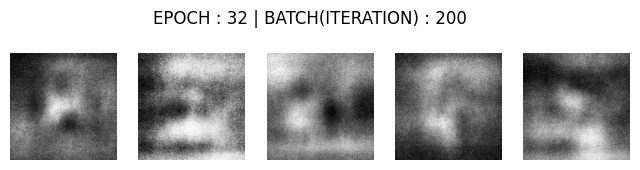

[Epoch: 32/50] [Batch: 211/211] [D loss: 0.527915] [G loss: 1.224403]


  0%|          | 0/211 [00:00<?, ?it/s]

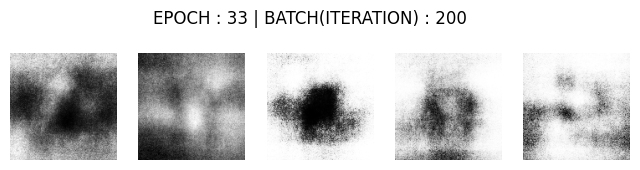

[Epoch: 33/50] [Batch: 211/211] [D loss: 0.488540] [G loss: 1.049623]


  0%|          | 0/211 [00:00<?, ?it/s]

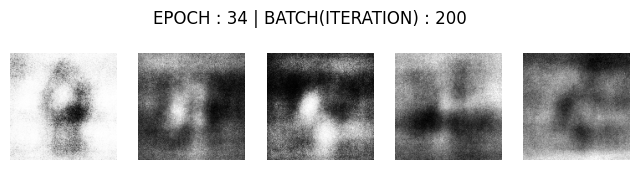

[Epoch: 34/50] [Batch: 211/211] [D loss: 0.617164] [G loss: 0.850923]


  0%|          | 0/211 [00:00<?, ?it/s]

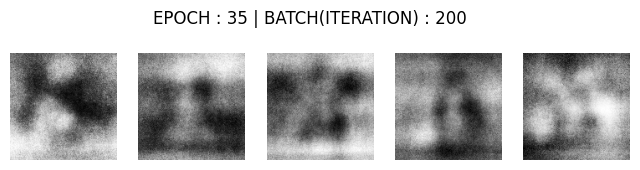

[Epoch: 35/50] [Batch: 211/211] [D loss: 0.658405] [G loss: 0.831609]


  0%|          | 0/211 [00:00<?, ?it/s]

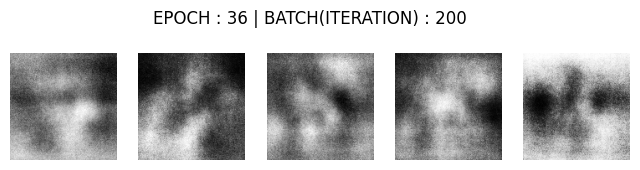

[Epoch: 36/50] [Batch: 211/211] [D loss: 0.631258] [G loss: 1.053858]


  0%|          | 0/211 [00:00<?, ?it/s]

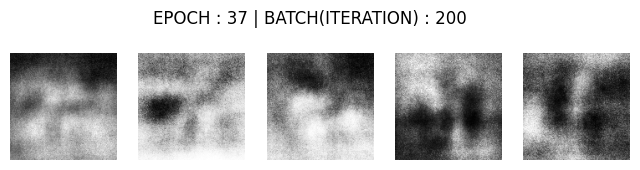

[Epoch: 37/50] [Batch: 211/211] [D loss: 0.584104] [G loss: 1.110444]


  0%|          | 0/211 [00:00<?, ?it/s]

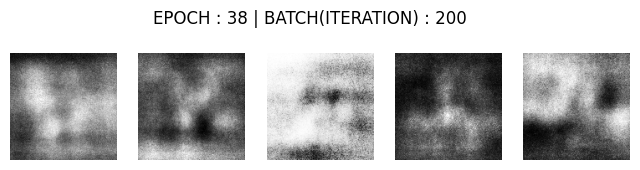

[Epoch: 38/50] [Batch: 211/211] [D loss: 0.635080] [G loss: 0.869665]


  0%|          | 0/211 [00:00<?, ?it/s]

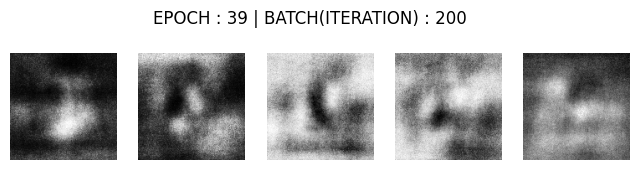

[Epoch: 39/50] [Batch: 211/211] [D loss: 0.600053] [G loss: 0.914370]


  0%|          | 0/211 [00:00<?, ?it/s]

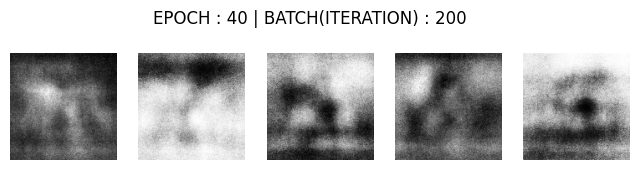

[Epoch: 40/50] [Batch: 211/211] [D loss: 0.559695] [G loss: 1.176160]


  0%|          | 0/211 [00:00<?, ?it/s]

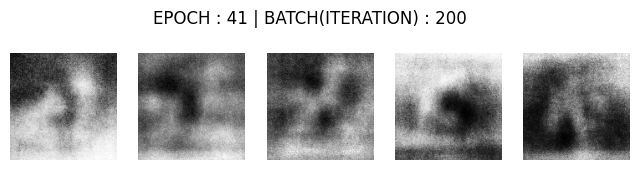

[Epoch: 41/50] [Batch: 211/211] [D loss: 0.649899] [G loss: 0.956550]


  0%|          | 0/211 [00:00<?, ?it/s]

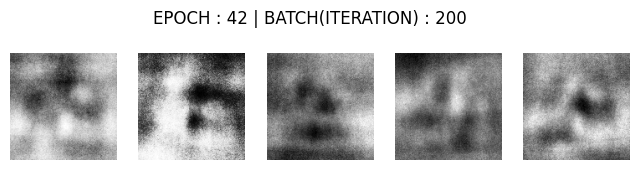

[Epoch: 42/50] [Batch: 211/211] [D loss: 0.549184] [G loss: 1.047058]


  0%|          | 0/211 [00:00<?, ?it/s]

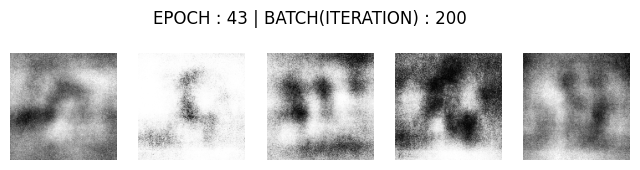

[Epoch: 43/50] [Batch: 211/211] [D loss: 0.568297] [G loss: 1.031116]


  0%|          | 0/211 [00:00<?, ?it/s]

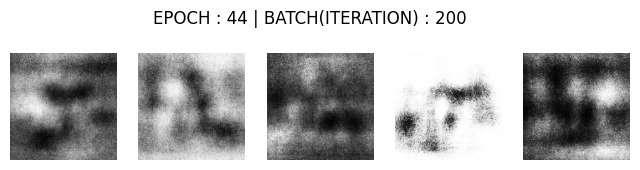

[Epoch: 44/50] [Batch: 211/211] [D loss: 0.626015] [G loss: 1.002560]


  0%|          | 0/211 [00:00<?, ?it/s]

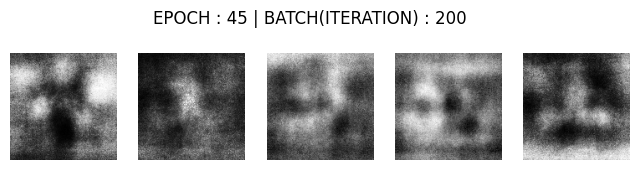

[Epoch: 45/50] [Batch: 211/211] [D loss: 0.520414] [G loss: 1.152275]


  0%|          | 0/211 [00:00<?, ?it/s]

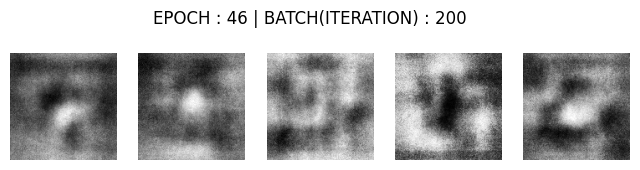

[Epoch: 46/50] [Batch: 211/211] [D loss: 0.657817] [G loss: 0.962591]


  0%|          | 0/211 [00:00<?, ?it/s]

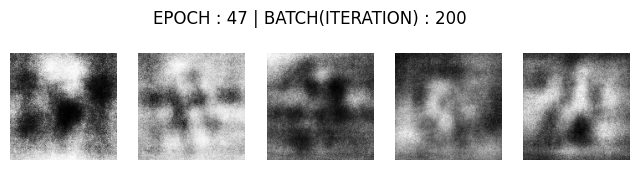

[Epoch: 47/50] [Batch: 211/211] [D loss: 0.568417] [G loss: 1.163408]


  0%|          | 0/211 [00:00<?, ?it/s]

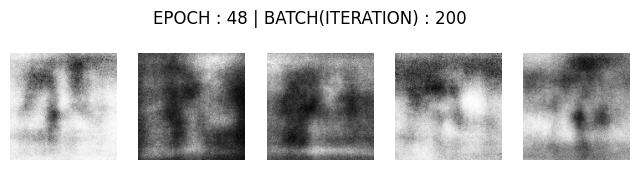

[Epoch: 48/50] [Batch: 211/211] [D loss: 0.577939] [G loss: 1.022791]


  0%|          | 0/211 [00:00<?, ?it/s]

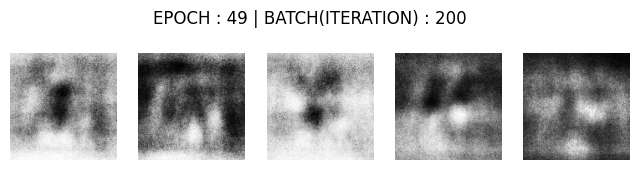

[Epoch: 49/50] [Batch: 211/211] [D loss: 0.656605] [G loss: 1.174013]


  0%|          | 0/211 [00:00<?, ?it/s]

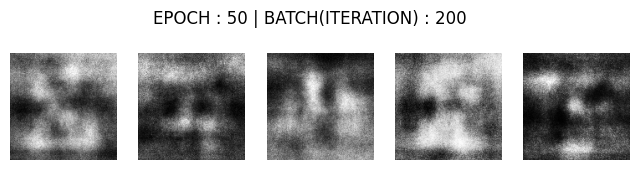

[Epoch: 50/50] [Batch: 211/211] [D loss: 0.515356] [G loss: 0.956509]


In [23]:
n_epochs = 50
Tensor = torch.FloatTensor
for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(tqdm(dataloader)): # This code(enumerate) is dealt with once more in the *TEST_CODE below.
                                                     # Used 'tqdm' for showing progress 
        
        # Adversarial ground truths (For more detail, refer *Read_More below)
        valid = Variable(Tensor(imgs.size(0), 1).fill_(1.0), requires_grad=False) # imgs.size(0) == batch_size(1 batch) == 64, *TEST_CODE
        fake = Variable(Tensor(imgs.size(0), 1).fill_(0.0), requires_grad=False) # And Variable is for caclulate gradient. In fact, you can use it, but you don't have to. 
                                                                                # requires_grad=False is default in tensor type. *Read_More
        
        # Configure input
        real_imgs = imgs.type(Tensor) # As mentioned, it is no longer necessary to wrap the tensor in a Variable.
      # real_imgs = Variable(imgs.type(Tensor)) # requires_grad=False, Default! It's same.
    
# ------------
# Train Generator
# ------------
        optimizer_G.zero_grad()
        
        # sample noise 'z' as generator input
        z = Tensor(np.random.normal(0, 1, (imgs.shape[0],latent_dim))) # Random sampling Tensor(batch_size, latent_dim) of Gaussian distribution
        # z.shape == torch.Size([64, 100])
        
        # Generate a batch of images
        gen_imgs = generator(z)
        # gen_imgs.shape == torch.Size([64, 1, 28, 28])
        
        # Loss measures generator's ability to fool the discriminator
        g_loss = adversarial_loss(discriminator(gen_imgs), valid) # torch.nn.BCELoss() compare result(64x1) and valid(64x1, filled with 1)
        
        g_loss.backward()
        optimizer_G.step()
        
# ------------
# Train Discriminator
# ------------
        optimizer_D.zero_grad()
        
        # Measure discriminator's ability to classify real from generated samples
        real_loss = adversarial_loss(discriminator(real_imgs), valid) # torch.nn.BCELoss() compare result(64x1) and valid(64x1, filled with 1)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake) # We are learning the discriminator now. So have to use detach() 
                                                                             
        d_loss = (real_loss + fake_loss) / 2
        
        d_loss.backward()# If didn't use detach() for gen_imgs, all weights of the generator will be calculated with backward(). 
        optimizer_D.step()
         
    

# ------------
# Real Time Visualization (While Training)
# ------------
        
        sample_z_in_train = Tensor(np.random.normal(0, 1, (imgs.shape[0],latent_dim)))
        # z.shape == torch.Size([64, 100])
        sample_gen_imgs_in_train = generator(sample_z_in_train).detach().cpu()
        # gen_imgs.shape == torch.Size([64, 1, 28, 28])
        
        if ((i+1) % 200) == 0: # show while batch - 200/657, 400/657, 600/657
            nrow=1
            ncols=5
            fig, axes = plt.subplots(nrows=nrow,ncols=ncols, figsize=(8,2))
            plt.suptitle('EPOCH : {} | BATCH(ITERATION) : {}'.format(epoch+1, i+1))
            for ncol in range(ncols):
                axes[ncol].imshow(sample_gen_imgs_in_train.permute(0,2,3,1)[ncol], cmap='gray')
                axes[ncol].axis('off')
            plt.show()
    print(
        "[Epoch: %d/%d] [Batch: %d/%d] [D loss: %f] [G loss: %f]"
        % (epoch+1, n_epochs, i+1, len(dataloader), d_loss.item(), g_loss.item())
    )